# Load required modules

In [272]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [274]:
df = pd.read_csv('dataset/day.csv')

In [275]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Preprocessing

## Rename columns to standardized names for better interpretability

In [276]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [277]:
df.drop('rec_id', axis=1, inplace=True)

In [278]:
df.head()

,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Feature Engineering

In [279]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df["day_of_month"] = df.index.day

df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')
df['day_of_month'] = df.day_of_month.astype('category')

df['atemp'] = df['atemp']*50
df['humidity'] = df['humidity']*100
df['windspeed'] = df['windspeed']*67

df['year'] = df['year'].replace(0,2011)
df['year'] = df['year'].replace(1,2012)

## Correlation plot: Check correlation between dependent and independent features

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

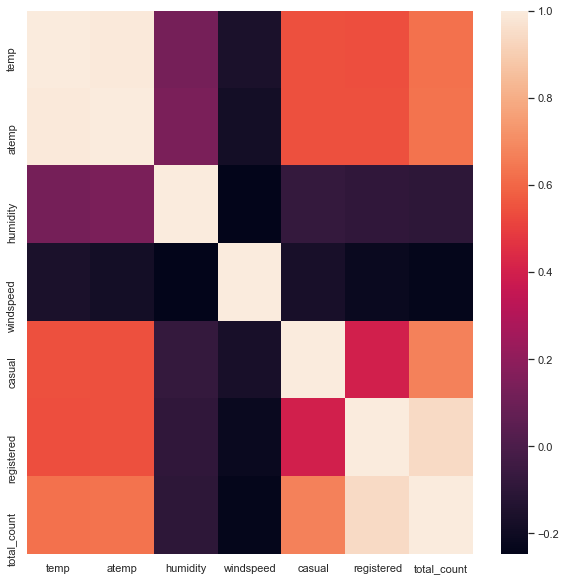

In [280]:
plt.figure(figsize = (10,10)), sns.heatmap(df.corr())

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

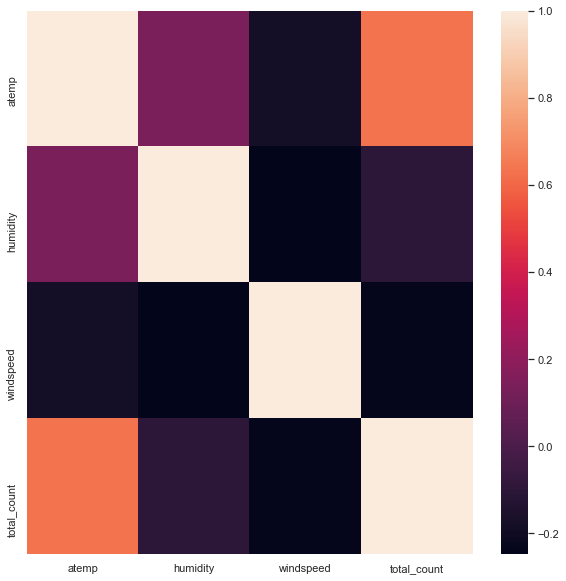

In [281]:
# Remove highly correlated values

df.drop(['casual','registered','temp'], axis = 1, inplace = True)

# Verify

plt.figure(figsize = (10,10)), sns.heatmap(df.corr())

## Inspect whether the dataset has null values: The plot suggests there are no null values for any of the features

<AxesSubplot:ylabel='datetime'>

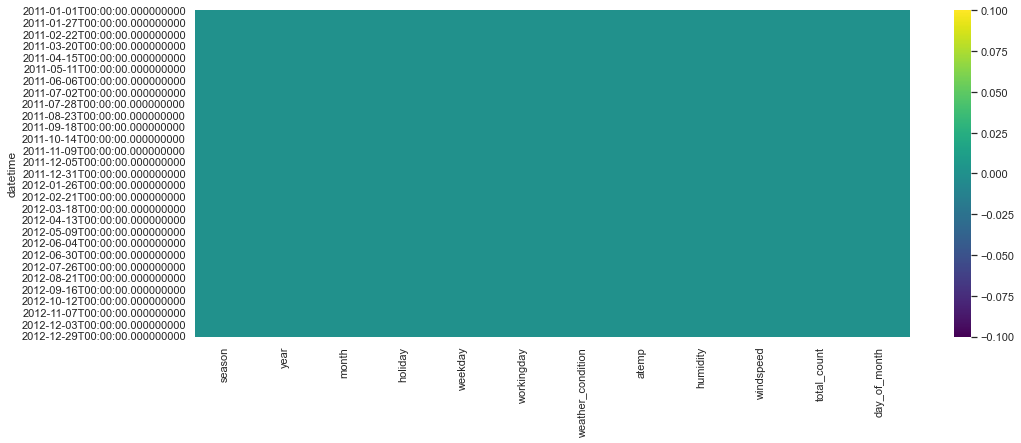

In [282]:
plt.figure(figsize=(16,6))
df.isnull().sum()
sns.heatmap(df.isnull(),cmap="viridis")

# Demand of bikes over the years
## Finding(s):
    1. There is high demand between the months May and October (Fall season)
    2. There is an increasing trend in the demand over the years

Text(0.5, 1.0, 'Demand of bikes over time')

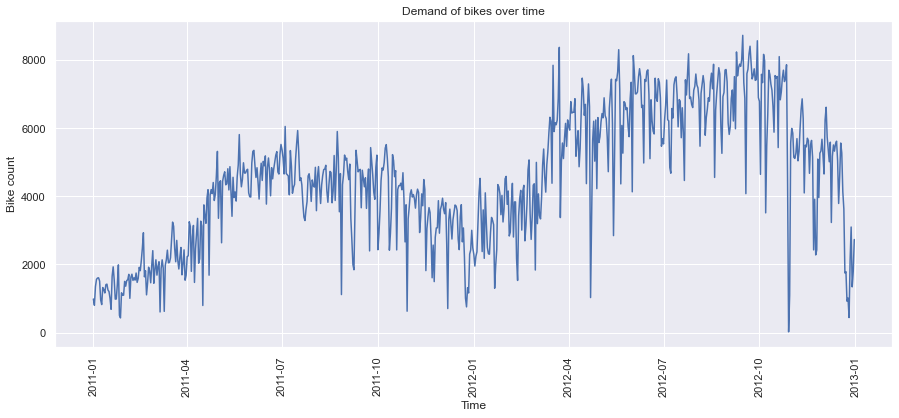

In [283]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x=df.index,y=df.total_count)
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Bike count')
plt.title('Demand of bikes over time')

# Demand of bikes in different months for each year
## Finding(s):
    1. The highest demand of bikes is in the month of **June** for year 2011.
    2. The highest demand of bikes is in the month of **September** for year 2012.

Text(0.5, 1.0, 'Demand of bikes w.r.t month')

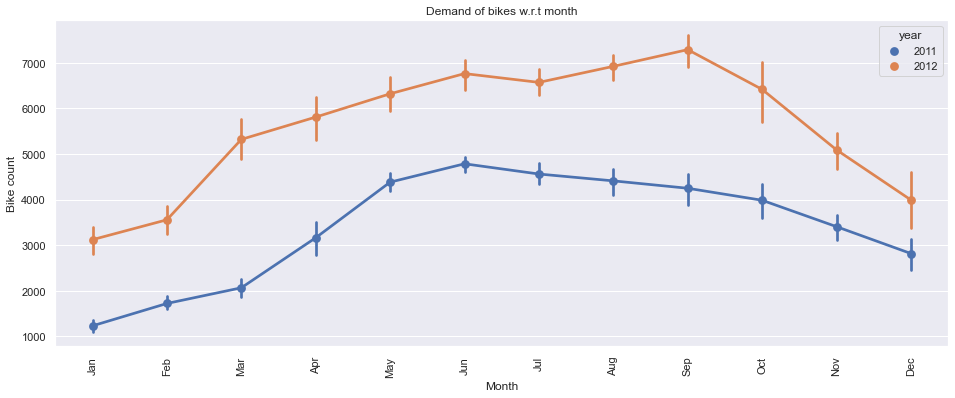

In [285]:
plt.figure(figsize=(16,6))
sns.pointplot(data=df,x=df.month,y=df.total_count, hue=df.year)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.xlabel('Month')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t month')

# Check if there are outliers in the monthly demand:
## Finding(s):
    1. There are no outliers in the monthls bike demand numbers.

Text(0.5, 1.0, 'Demand of bikes w.r.t month (outlier analysis)')

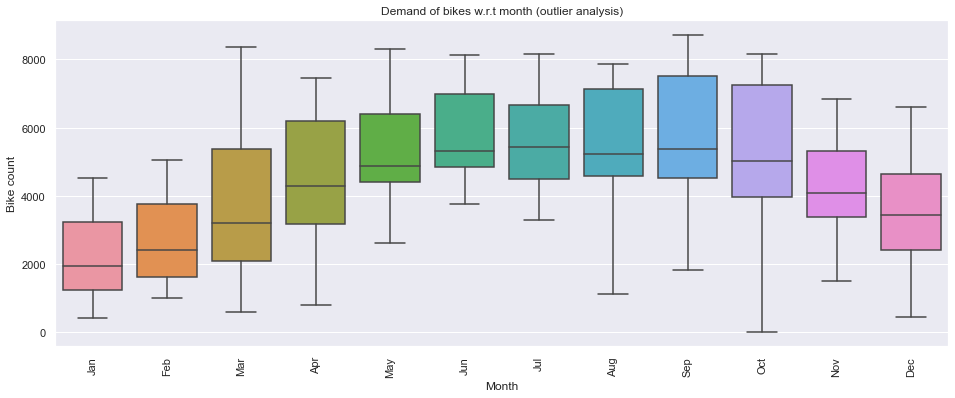

In [286]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["month"],y=df.total_count)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.xlabel('Month')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t month (outlier analysis)')

# Demand of bikes in different days of a month for each year
## Finding(s):
    1. There are no evident findings from this analysis. There is not much variance amongs the numbers.

Text(0.5, 1.0, 'Demand of bikes w.r.t day of month (outlier analysis)')

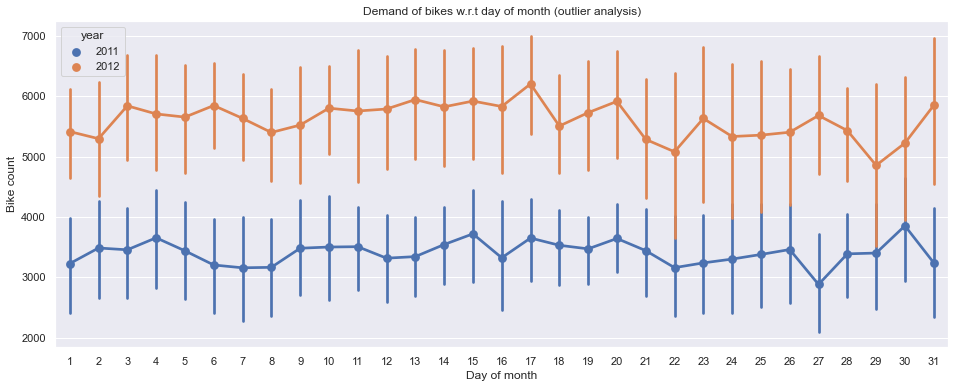

In [260]:
plt.figure(figsize=(16,6))
sns.pointplot(data=df,x=df.day_of_month,y=df.total_count, hue=df.year)
plt.xlabel('Day of month')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t day of month (outlier analysis)')

Text(0.5, 1.0, 'Demand of bikes w.r.t day of month (outlier analysis)')

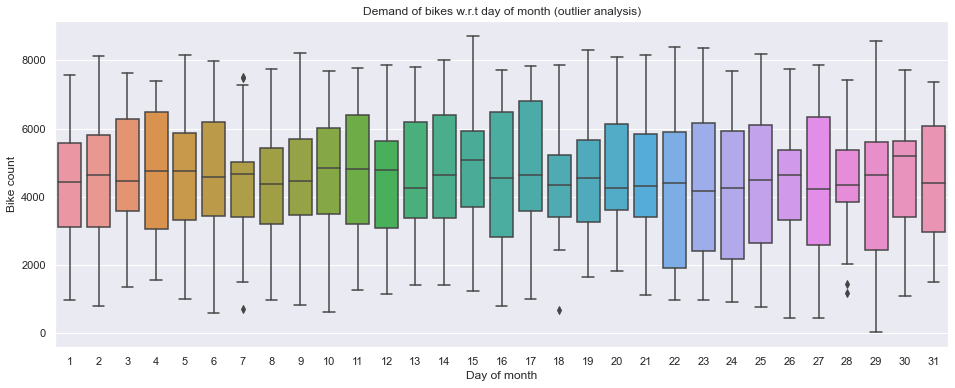

In [287]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["day_of_month"],y=df.total_count)
plt.xlabel('Day of month')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t day of month (outlier analysis)')

# Demand of bikes in different weekdays for each year
## Findings: 
 1. There is high demand on Wednesdays and Thursdays for year 2012.
 2. There is no evident findings for the year 2011.

Text(0.5, 1.0, 'Demand of bikes w.r.t day of week')

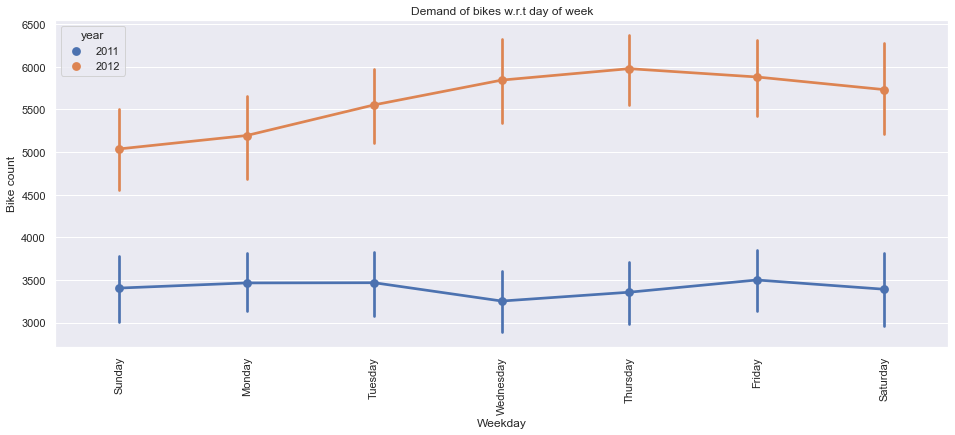

In [288]:
plt.figure(figsize=(16,6))
sns.pointplot(data=df,x=df.weekday,y=df.total_count, hue=df.year)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=90)
plt.title('Bike count per month')
plt.xlabel('Weekday')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t day of week')

Text(0.5, 1.0, 'Demand of bikes w.r.t day of week (Outlier analysis)')

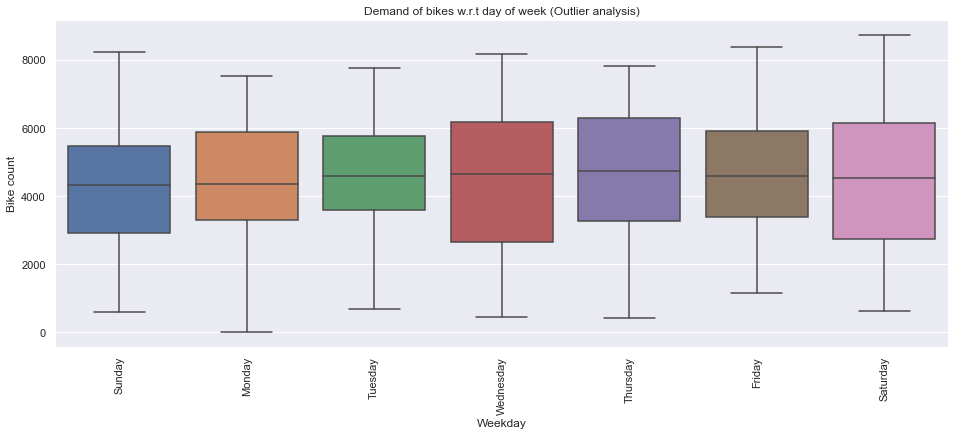

In [289]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["weekday"],y=df.total_count)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=90)
plt.xlabel('Weekday')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t day of week (Outlier analysis)')

# Demand of bikes in different weather conditions for each year
## Finding(s):
1. There is high demand of bikes in clear weather condtions and least for rainy conditions.

Text(0.5, 1.0, 'Demand of bikes w.r.t weather condition')

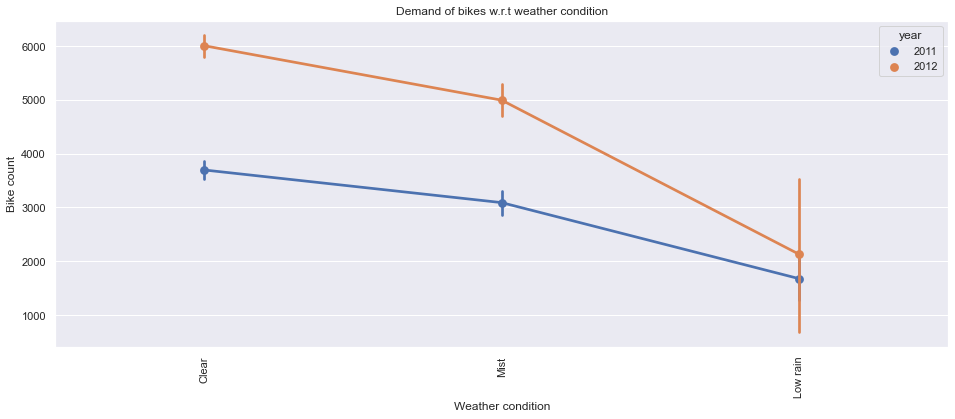

In [264]:
plt.figure(figsize=(16,6))
sns.pointplot(data=df,x=df.weather_condition,y=df.total_count, hue=df.year)
plt.xticks(ticks=[0,1,2], labels=['Clear','Mist','Low rain'], rotation=90)
plt.xlabel('Weather condition')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t weather condition')

# Demand of bikes in different seasons for each year
## Finding(s):
    1. The highest demand of bikes in the Fall season.

Text(0.5, 1.0, 'Demand of bikes w.r.t seasons')

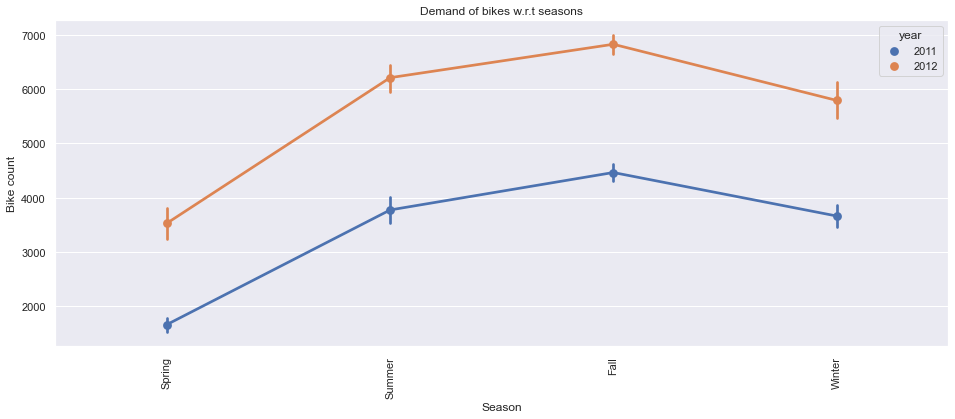

In [265]:
plt.figure(figsize=(16,6))
sns.pointplot(data=df,x=df.season,y=df.total_count, hue=df.year)
plt.xticks(ticks=[0,1,2,3], labels=['Spring','Summer','Fall','Winter'], rotation=90)
plt.xlabel('Season')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t seasons')

# Demand of bikes in different outdoor temperatures for each year
## Finding(s):
    1. The demand of bikes increases with outside temperatures above 25 degree C until 38 degree C at which point it decreases.

Text(0.5, 1.0, 'Demand of bikes w.r.t feel temperature')

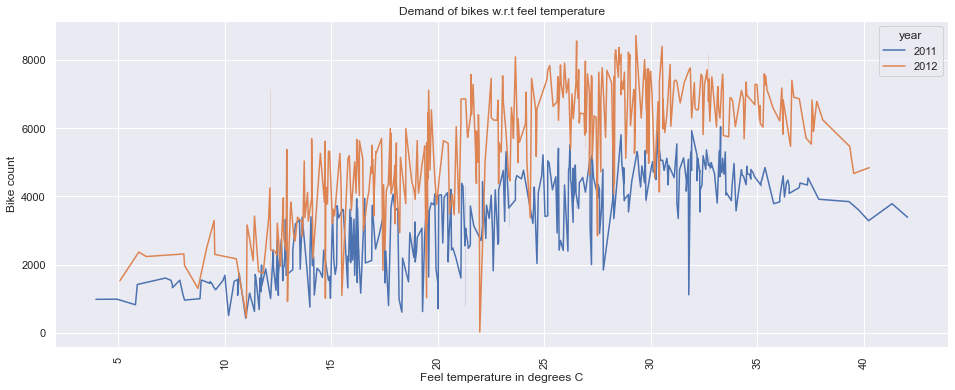

In [266]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,x=df.atemp,y=df.total_count, hue=df.year)
plt.xticks(rotation=90)
plt.xlabel('Feel temperature in degrees C')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t feel temperature')

# Demand of bikes in different humidity numbers for each year
## Finding(s):
    1. The is high demand of bikes when the humidity is between 42 - 75 degrees F after which it decreases.

Text(0.5, 1.0, 'Demand of bikes w.r.t humidity')

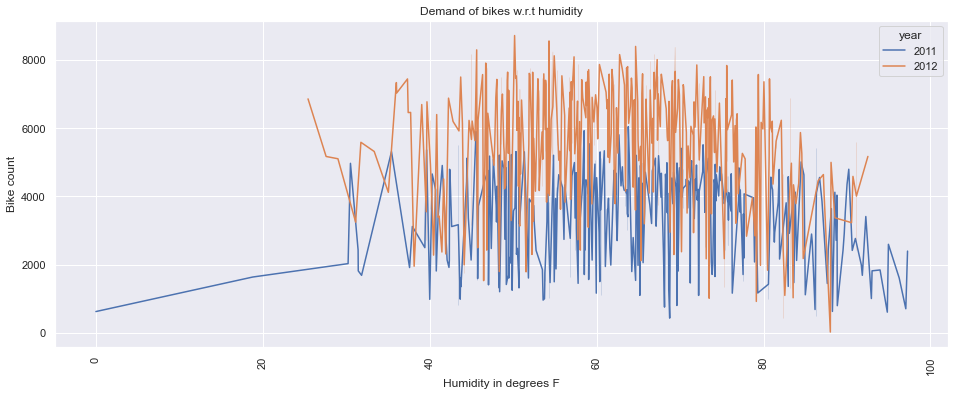

In [291]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,x=df.humidity,y=df.total_count, hue=df.year)
plt.xticks(rotation=90)
plt.xlabel('Humidity in degrees F')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t humidity')

# Demand of bikes in different w.r.t for each year
## Finding(s):
    1. The is high demand of bikes whem the windspeed is between 5 - 20 mph. 

Text(0.5, 1.0, 'Demand of bikes w.r.t windspeed')

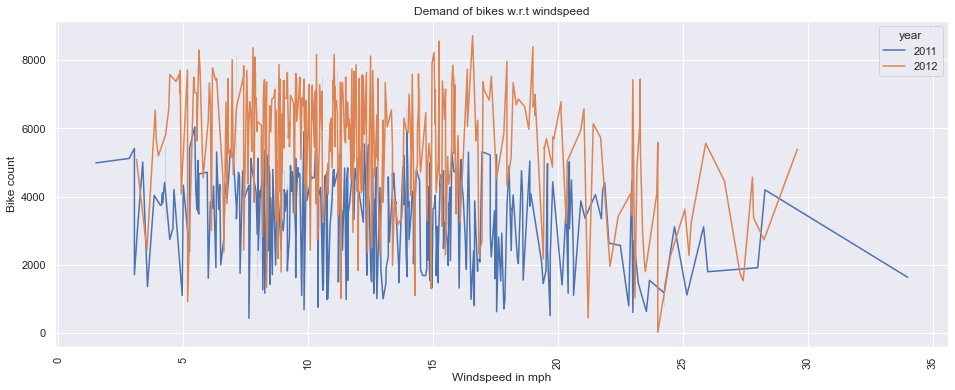

In [294]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,x=df.windspeed,y=df.total_count, hue=df.year)
plt.xticks(rotation=90)
plt.xlabel('Windspeed in mph')
plt.ylabel('Bike count')
plt.title('Demand of bikes w.r.t windspeed')

## Summary: 
    1. There is high demand between the months May and October (Fall season)
    2. There is an increasing trend in the demand over the years
    3. There is high demand of bikes on Wednesdays and Thursdays in 2012.
    4. There is highest demand of bikes in clear conditions and least in rainy conditions.
    5. The highest demand of bikes is in Fall season.
    6. The demand of bikes increase when the outside temperature is between 25 - 38 degree C.
    7. The is high demand of bikes when the humidity is between 42 - 75 degrees F after which it decreases.
    8. The is high demand of bikes whem the windspeed is between 5 - 20 mph. 